In [4]:
import pandas as pd
import yfinance as yf
import pandas_datareader as wb
import matplotlib.pyplot as plt

In [9]:
# data = yf.Ticker('BTC-USD')
# df = data.history(start='2023-01-01')
df = yf.download(tickers='BTC-USD',start='2023-01-09')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-09,17093.992188,17389.957031,17093.992188,17196.554688,17196.554688,18624736866
2023-01-10,17192.949219,17484.720703,17162.990234,17446.292969,17446.292969,15808338949
2023-01-11,17446.359375,17934.896484,17337.994141,17934.896484,17934.896484,18372283782
2023-01-12,18117.593750,19030.087891,17995.203125,18869.587891,18869.587891,34971338710
2023-01-13,18868.906250,19964.322266,18753.164062,19909.574219,19909.574219,29225029694
...,...,...,...,...,...,...
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347
2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,43989.195312,16092503468
2024-01-07,43998.464844,44495.570312,43662.230469,43943.097656,43943.097656,19330573863


In [12]:
def MACD(DF,a,b,c):
    df = DF.copy()
    df['MA FAST'] = df['Close'].ewm(span=a , min_periods= a).mean()
    df['MA SLOW'] = df['Close'].ewm(span=b , min_periods= b).mean()
    df['MACD'] = df['MA FAST'] - df['MA SLOW']
    df['Signal'] = df['MACD'].ewm(span=c ,min_periods = c).mean()
    df.dropna(inplace=True)
    return df

In [14]:
data = MACD(df , 12 , 26 , 9)
data

,Open,High,Low,Close,Adj Close,Volume,MA FAST,MA SLOW,MACD,Signal
Date,,,,,,,,,,
2023-02-11,21651.841797,21891.410156,21618.449219,21870.875000,21870.875000,16356226232,22549.129925,22505.735979,43.393946,241.273785
2023-02-12,21870.902344,22060.994141,21682.828125,21788.203125,21788.203125,17821046406,22431.725097,22448.729811,-17.004714,183.404408
2023-02-13,21787.000000,21898.414062,21460.087891,21808.101562,21808.101562,23918742607,22335.547917,22398.105543,-62.557626,129.589320
2023-02-14,21801.822266,22293.140625,21632.394531,22220.804688,22220.804688,26792596581,22317.858525,22384.163720,-66.305195,87.519394
2023-02-15,22220.585938,24307.841797,22082.769531,24307.841797,24307.841797,32483312909,22624.546547,22534.743070,89.803477,88.002785
...,...,...,...,...,...,...,...,...,...,...
2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347,43446.467019,42757.323468,689.143552,726.340123
2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,43989.195312,16092503468,43529.963680,42848.573234,681.390446,717.350188
2024-01-07,43998.464844,44495.570312,43662.230469,43943.097656,43943.097656,19330573863,43593.522753,42929.649117,663.873636,706.654877


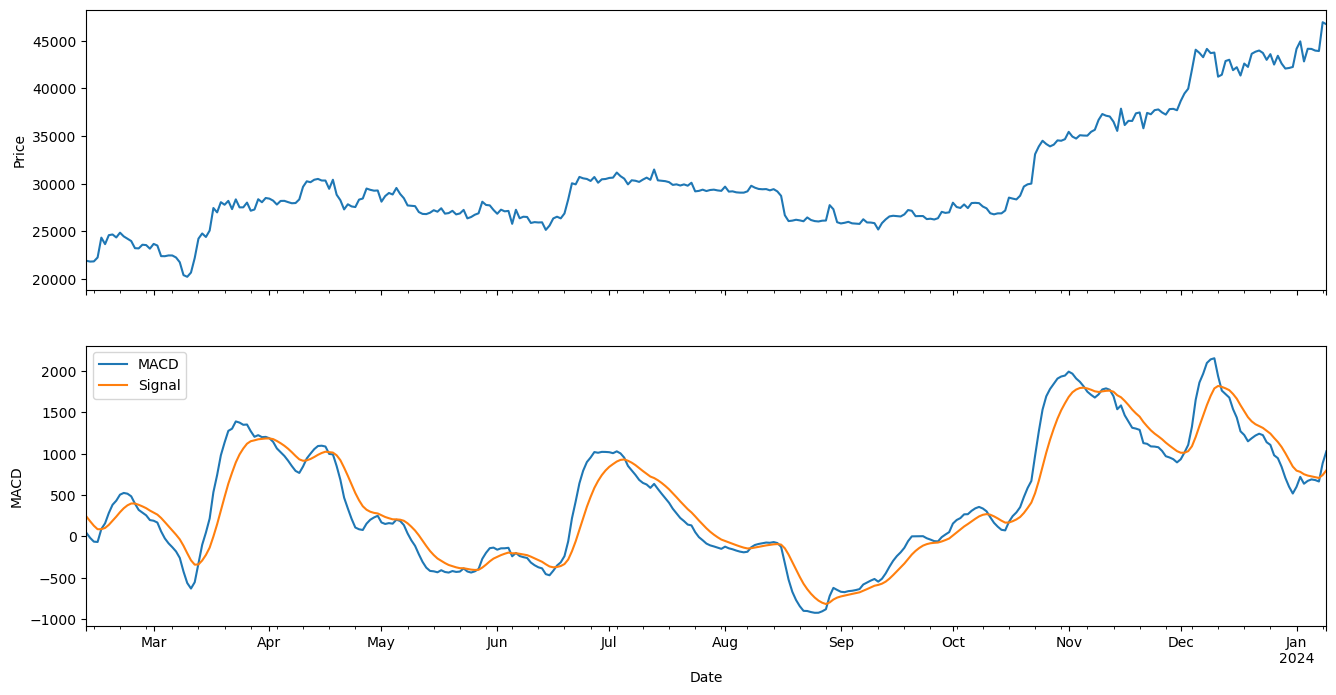

In [18]:
fig , (ax0 , ax1) = plt.subplots(nrows=2 , ncols=1 , sharex=True , sharey=False , figsize = (16,8))
data.iloc[: , 3].plot(ax=ax0)
ax0.set(ylabel = 'Price')

data.iloc[: , [-2,-1]].plot(ax=ax1)
ax1.set(xlabel = 'Date', ylabel='MACD')

fig.suptitle =('MACD INDICATOR')
